In [11]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
import math
from datetime import date, timedelta, datetime
import time
from tqdm import tqdm
import seaborn as sns
from scipy import stats
import xlsxwriter
from matplotlib.ticker import MaxNLocator
from matplotlib.backends.backend_pdf import PdfPages
start_time = time.perf_counter()

In [12]:
import glob
import os

# Define the folder path containing the CSV files
folder_path = 'factor_nav_7_5_2025'

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Create an empty DataFrame to store the merged result
merged_df = None

# Process each CSV file
for file in csv_files:
    # Extract the factor/strategy name from the filename
    file_name = os.path.splitext(os.path.basename(file))[0]
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Drop 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    
    # Convert 'Date' column to datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Get the name of the factor/strategy column (the column that's not 'Date')
    factor_col = [col for col in df.columns if col != 'Date'][0]
    
    # Create a simple DataFrame with just Date and the factor column
    simple_df = df[['Date', factor_col]]
    
    # If this is the first file, initialize the merged DataFrame
    if merged_df is None:
        merged_df = simple_df
    else:
        # Merge with the existing DataFrame
        merged_df = pd.merge(merged_df, simple_df, on='Date', how='outer')

# Now load the benchmark data
df1 = pd.read_excel('latest size data.xlsx')
df1 = df1[['Date', 'NIFTY500']]
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
df1['Date'] = pd.to_datetime(df1['Date'])

# Merge with the benchmark data
merged_df = pd.merge(merged_df, df1, on='Date', how='inner')

# Set 'Date' as the index
merged_df.set_index('Date', inplace=True)

# Display the column names to confirm no duplicates
print("Final columns:", merged_df.columns.tolist())
print(f"Shape of final dataframe: {merged_df.shape}")

Final columns: ['ThemeUltraShortAM', 'ThemeShortAM', 'ShiftedAM', 'ThemeDownVol', 'ThemeLowBeta', 'ValuePrice', 'ThemeAvgVol', 'Dividend', 'Mcap', 'UltraShortAM', 'SectorValueYield', 'ShortSectorAM', 'SectorTrendMR', 'ValueYieldNoPeg', 'QualityAnnual', 'SectorLowBeta', 'SectorGrowthConsol', 'SectorDownVol', 'ThemeEM', 'ThemeTrendMR', 'SectorAM', 'ThemeValueYield', 'EM', 'QualityAnnualConsol', 'SectorLowVol', 'Theme', 'LTM', 'Growth', 'LongAM', 'ValueABSExDiv', 'ThemeLTM', 'LowVol', 'SectorGrowth', 'LTMA', 'ValueYieldExDiv', 'AntiTrendMR', 'TrendMR', 'ValueYield', 'SectorValuePrice', 'Sector', 'HighBeta', 'QualityQuarter', 'ThemeHighBeta', 'SectorAvgVol', 'AM', 'GrowthConsol', 'MidSectorAM', 'MidAM', 'SectorAntiTrendMR', 'ShortAM', 'SectorValueABS', 'LowBeta', 'DownVol', 'ThemeGrowthConsol', 'QualityQuarterConsol', 'AvgVol', 'ThemeAntiTrendMR', 'ThemeLowVol', 'ThemeMidAM', 'ValueABSNoPeg', 'MCAP_Type', 'ThemeValuePrice', 'LongSectorAM', 'SectorHighBeta', 'ThemeLTMA', 'ThemeAM', 'GICS', 

In [13]:
merged_df

,ThemeUltraShortAM,ThemeShortAM,ShiftedAM,ThemeDownVol,ThemeLowBeta,ValuePrice,ThemeAvgVol,Dividend,Mcap,UltraShortAM,...,SectorHighBeta,ThemeLTMA,ThemeAM,GICS,ThemeGrowth,ThemeLongAM,ThemeValueABS,UltraShortSectorAM,ValueABS,NIFTY500
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2910.35
2006-04-03,102.769931,102.481586,102.369889,102.185933,101.774494,102.727455,102.137622,102.640474,102.213732,101.800750,...,103.078483,101.980015,102.059241,102.062774,102.640474,101.998642,102.640474,102.880312,102.640474,2974.10
2006-04-04,102.814496,103.094063,103.433402,103.600218,102.205667,104.113153,102.968706,102.978602,103.197186,101.421037,...,103.458835,103.313113,103.034117,102.343443,102.978602,103.406490,102.978602,103.003351,102.978602,2993.00
2006-04-05,103.839226,104.726520,104.996923,104.508363,103.555643,105.789245,104.116477,104.375147,104.522559,103.072466,...,104.463699,104.286970,104.402783,104.054556,104.375147,104.699965,104.375147,104.683300,104.375147,3022.30
2006-04-07,102.934062,104.318834,104.305059,103.707067,102.903976,103.905525,103.047363,103.141888,102.902834,101.380419,...,103.434155,103.774803,103.991615,103.725306,103.141888,104.171625,103.141888,104.290743,103.141888,2977.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,1621.221312,2278.151422,2045.438926,1522.052756,1948.019765,182.523677,1221.329337,1333.297540,388.240436,467.842503,...,377.409559,1706.498540,3088.976260,228.254934,1709.385317,1604.341410,943.829469,1513.244183,1784.436176,20356.75
2025-04-11,1651.373166,2321.764100,2118.164964,1548.981229,1983.106300,185.064503,1237.888006,1354.808869,395.773931,477.075254,...,387.233856,1738.852646,3145.480537,232.601565,1759.633587,1644.267041,956.498721,1538.555654,1816.322625,20752.85
2025-04-15,1688.004669,2400.408375,2159.202343,1581.999686,2011.510482,189.695811,1265.338566,1385.945782,404.679104,491.017144,...,402.592793,1792.297725,3247.028844,237.662799,1820.522915,1700.376280,979.793166,1567.582102,1861.792927,21279.40


In [14]:
##OLD MERGING CODE

# import glob

# # Define the folder path containing the CSV files
# folder_path = 'factor_nav_21_4_2025'  # Update the folder path if necessary

# # Get a list of all CSV files in the folder
# csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# # List to store individual cleaned DataFrames
# regimecleaned_dataframes = []

# # Load and clean each CSV file
# for file in csv_files:
#     df = pd.read_csv(file)
#     # Drop 'Unnamed: 0' column if it exists
#     if 'Unnamed: 0' in df.columns:
#         df = df.drop(columns=['Unnamed: 0'])
#     # Convert 'Date' column to datetime if present
#     if 'Date' in df.columns:
#         df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
#     regimecleaned_dataframes.append(df)

# # Check if any DataFrame was loaded
# if not regimecleaned_dataframes:
#     raise ValueError("No CSV files found in the folder.")

# # # Start with the first DataFrame
# regime_df = regimecleaned_dataframes[0]

# # Merge all DataFrames on the 'Date' column using an outer join
# for df in regimecleaned_dataframes[1:]:
#     regime_df = pd.merge(regime_df, df, on='Date', how='outer')

# # Ensure 'Date' is in datetime format
# regime_df['Date'] = pd.to_datetime(regime_df['Date'], errors='coerce')

# # Optionally, drop rows with missing values (if needed)
# # regime_df = regime_df.dropna()

# # Optionally, set 'Date' as the index
# regime_df.set_index('Date', inplace=True)

# # Load the benchmark data
# df1 = pd.read_excel('latest size data.xlsx')
# df1 = df1[['Date', 'NIFTY500']]
# df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
# df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
# df1['Date'] = pd.to_datetime(df1['Date'])

# merged_df = pd.merge(regime_df, df1, on='Date', how='inner')

# # Set 'Date' as the index for further calculations
# merged_df.set_index('Date', inplace=True)

In [15]:
merged_df

,ThemeUltraShortAM,ThemeShortAM,ShiftedAM,ThemeDownVol,ThemeLowBeta,ValuePrice,ThemeAvgVol,Dividend,Mcap,UltraShortAM,...,SectorHighBeta,ThemeLTMA,ThemeAM,GICS,ThemeGrowth,ThemeLongAM,ThemeValueABS,UltraShortSectorAM,ValueABS,NIFTY500
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2910.35
2006-04-03,102.769931,102.481586,102.369889,102.185933,101.774494,102.727455,102.137622,102.640474,102.213732,101.800750,...,103.078483,101.980015,102.059241,102.062774,102.640474,101.998642,102.640474,102.880312,102.640474,2974.10
2006-04-04,102.814496,103.094063,103.433402,103.600218,102.205667,104.113153,102.968706,102.978602,103.197186,101.421037,...,103.458835,103.313113,103.034117,102.343443,102.978602,103.406490,102.978602,103.003351,102.978602,2993.00
2006-04-05,103.839226,104.726520,104.996923,104.508363,103.555643,105.789245,104.116477,104.375147,104.522559,103.072466,...,104.463699,104.286970,104.402783,104.054556,104.375147,104.699965,104.375147,104.683300,104.375147,3022.30
2006-04-07,102.934062,104.318834,104.305059,103.707067,102.903976,103.905525,103.047363,103.141888,102.902834,101.380419,...,103.434155,103.774803,103.991615,103.725306,103.141888,104.171625,103.141888,104.290743,103.141888,2977.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,1621.221312,2278.151422,2045.438926,1522.052756,1948.019765,182.523677,1221.329337,1333.297540,388.240436,467.842503,...,377.409559,1706.498540,3088.976260,228.254934,1709.385317,1604.341410,943.829469,1513.244183,1784.436176,20356.75
2025-04-11,1651.373166,2321.764100,2118.164964,1548.981229,1983.106300,185.064503,1237.888006,1354.808869,395.773931,477.075254,...,387.233856,1738.852646,3145.480537,232.601565,1759.633587,1644.267041,956.498721,1538.555654,1816.322625,20752.85
2025-04-15,1688.004669,2400.408375,2159.202343,1581.999686,2011.510482,189.695811,1265.338566,1385.945782,404.679104,491.017144,...,402.592793,1792.297725,3247.028844,237.662799,1820.522915,1700.376280,979.793166,1567.582102,1861.792927,21279.40


In [6]:
# ###Negative Zscore Weighting

# def calculate_cross_sectional_zscore(df, metric_columns, inverse_columns=[]):
#     """
#     Calculate z-score across factors for given metric columns on each day,
#     inverting specified columns so that lower values correspond to higher z-scores.
#     """
#     adjusted_df = df.copy()
    
#     # Invert specified columns for correct z-score scaling
#     for col in inverse_columns:
#         adjusted_df[col] = -adjusted_df[col]
    
#     return (adjusted_df[metric_columns] - adjusted_df[metric_columns].mean(axis=1).values[:, None]) / \
#            adjusted_df[metric_columns].std(axis=1).values[:, None]

# def calculate_metrics(df, benchmark_col='Nifty 500 ', lookback_days=44):
#     """
#     Calculate various metrics for factor analysis and their daily cross-sectional z-scores.
#     """
#     metrics_df = pd.DataFrame(index=df.index)
    
#     # Get factor columns (exclude benchmark)
#     factor_cols = [col for col in df.columns if col != benchmark_col]
    
#     # Dictionary to store columns for each metric type
#     metric_columns = {
#         'benchmark_ratio': [],
#         'alpha': [],
#         'ema_ratio': [],
#         'vol_ema_ratio': [],
#         'vol_benchmark_ratio': [],
#         'sharpe_abs': []
#     }
    
#     # Calculate returns and rolling returns
#     returns = df.pct_change()
#     log_returns = np.log1p(returns)
#     rolling_log_returns = log_returns.rolling(window=lookback_days).sum()
#     rolling_returns = np.expm1(rolling_log_returns)
    
#     # 1. 2-month rolling returns to benchmark rolling returns ratio
#     for col in factor_cols:
#         col_name = f'{col}_to_benchmark_ratio'
#         metrics_df[col_name] = rolling_returns[col] / rolling_returns[benchmark_col]
#         metric_columns['benchmark_ratio'].append(col_name)
    
#     # 2. Price to benchmark alpha (2-month rolling)
#     for col in factor_cols:
#         col_name = f'{col}_2m_alpha'
#         metrics_df[col_name] = rolling_returns[col] - rolling_returns[benchmark_col]
#         metric_columns['alpha'].append(col_name)
    
#     # 3. Price to EMA ratio
#     # ema_period = 44
#     # for col in factor_cols:
#     #     col_name = f'{col}_to_ema_ratio'
#     #     ema = df[col].ewm(span=ema_period).mean()
#     #     metrics_df[col_name] = df[col] / ema
#     #     metric_columns['ema_ratio'].append(col_name)
    
#     # 4. Volatility calculations
#     def annualized_vol(series):
#         return np.sqrt(252) * series.rolling(window=lookback_days).std()
    
#     # Calculate volatilities
#     vols = pd.DataFrame()
#     for col in factor_cols + [benchmark_col]:
#         vols[col] = annualized_vol(returns[col])
    
#     # # Vol to EMA of vol ratio
#     # for col in factor_cols:
#     #     col_name = f'{col}_vol_to_ema_ratio'
#     #     vol_ema = vols[col].ewm(span=ema_period).mean()
#     #     metrics_df[col_name] = vols[col] / vol_ema
#     #     metric_columns['vol_ema_ratio'].append(col_name)
    
#     # Vol to benchmark vol ratio
#     for col in factor_cols:
#         col_name = f'{col}_vol_to_benchmark_ratio'
#         metrics_df[col_name] = vols[col] / vols[benchmark_col]
#         metric_columns['vol_benchmark_ratio'].append(col_name)
    
#     # 5. Updated Sharpe Ratio calculations: (2m rolling returns - 2m rolling benchmark returns) / 2m vol
#     for col in factor_cols:
#         col_name = f'{col}_sharpe_abs'
#         excess_returns = rolling_returns[col] - rolling_returns[benchmark_col]
#         rolling_vol = vols[col]
        
#         metrics_df[col_name] = np.where(
#             rolling_vol == 0,
#             np.nan,
#             excess_returns / rolling_vol
#         )
#         metric_columns['sharpe_abs'].append(col_name)
    
#     # Calculate cross-sectional z-scores with inversion for vol-related metrics
#     for metric_type, columns in metric_columns.items():
#         inverse_cols = columns if metric_type in ['vol_ema_ratio', 'vol_benchmark_ratio'] else []
#         zscore_df = calculate_cross_sectional_zscore(metrics_df, columns, inverse_columns=inverse_cols)
#         for col, zscore_col in zip(columns, zscore_df.columns):
#             metrics_df[f'{col}_zscore'] = zscore_df[zscore_col]
    
#     return metrics_df

# def format_metrics_report(metrics_df, date=None, include_zscores=True):
#     """
#     Create a formatted report of metrics for a specific date.
#     """
#     if date is None:
#         date = metrics_df.index[-1]
        
#     daily_data = metrics_df.loc[date]
    
#     report = f"Factor Metrics Report for {date.strftime('%Y-%m-%d')}\n\n"
    
#     # Group metrics by factor
#     factor_metrics = {}
#     for col in daily_data.index:
#         if not include_zscores and '_zscore' in col:
#             continue
            
#         factor = col.split('_')[0]
#         if factor not in factor_metrics:
#             factor_metrics[factor] = []
#         factor_metrics[factor].append((col, daily_data[col]))
    
#     # Format report by factor
#     for factor, metrics in sorted(factor_metrics.items()):
#         report += f"{factor}:\n"
#         for metric_name, value in sorted(metrics):
#             metric_type = '_'.join(metric_name.split('_')[1:])
#             report += f"  {metric_type}: {value:.4f}\n"
#         report += "\n"
    
#     return report

# # Calculate metrics
# metrics_df = calculate_metrics(merged_df)

In [16]:
####Benchmark+Negative Zscore Weighting

def calculate_cross_sectional_zscore(df, metric_columns, inverse_columns=[]):
    """
    Calculate z-score across factors for given metric columns on each day,
    inverting specified columns so that lower values correspond to higher z-scores.
    """
    adjusted_df = df.copy()
    
    # Invert specified columns for correct z-score scaling
    for col in inverse_columns:
        adjusted_df[col] = -adjusted_df[col]
    
    return (adjusted_df[metric_columns] - adjusted_df[metric_columns].mean(axis=1).values[:, None]) / \
           adjusted_df[metric_columns].std(axis=1).values[:, None]

def calculate_metrics(df, benchmark_col='NIFTY500', lookback_days=44):
    """
    Calculate various metrics for factor analysis and their daily cross-sectional z-scores.
    """
    metrics_df = pd.DataFrame(index=df.index)
    
    # Get factor columns (exclude benchmark)
    factor_cols = [col for col in df.columns if col != benchmark_col]
    
    # Dictionary to store columns for each metric type
    metric_columns = {
        'benchmark_ratio': [],
        'alpha': [],
        'ema_ratio': [],
        'vol_ema_ratio': [],
        'vol_benchmark_ratio': [],
        'sharpe_abs': [],
        'sharpe': []  # Added for Sharpe ratio including benchmark
    }
    
    # Calculate returns and rolling returns
    returns = df.pct_change()
    log_returns = np.log1p(returns)
    rolling_log_returns = log_returns.rolling(window=lookback_days).sum()
    rolling_returns = np.expm1(rolling_log_returns)
    
    # 1. 2-month rolling returns to benchmark rolling returns ratio
    for col in factor_cols:
        col_name = f'{col}_to_benchmark_ratio'
        metrics_df[col_name] = rolling_returns[col] / rolling_returns[benchmark_col]
        metric_columns['benchmark_ratio'].append(col_name)
    
    # 2. Price to benchmark alpha (2-month rolling)
    for col in factor_cols:
        col_name = f'{col}_2m_alpha'
        metrics_df[col_name] = rolling_returns[col] - rolling_returns[benchmark_col]
        metric_columns['alpha'].append(col_name)
    
    # 3. Price to EMA ratio
    # ema_period = 44
    # for col in factor_cols:
    #     col_name = f'{col}_to_ema_ratio'
    #     ema = df[col].ewm(span=ema_period).mean()
    #     metrics_df[col_name] = df[col] / ema
    #     metric_columns['ema_ratio'].append(col_name)
    
    # 4. Volatility calculations
    def annualized_vol(series):
        return np.sqrt(252) * series.rolling(window=lookback_days).std()
    
    # Calculate volatilities
    vols = pd.DataFrame()
    for col in factor_cols + [benchmark_col]:
        vols[col] = annualized_vol(returns[col])
    
    # # Vol to EMA of vol ratio
    # for col in factor_cols:
    #     col_name = f'{col}_vol_to_ema_ratio'
    #     vol_ema = vols[col].ewm(span=ema_period).mean()
    #     metrics_df[col_name] = vols[col] / vol_ema
    #     metric_columns['vol_ema_ratio'].append(col_name)
    
    # Vol to benchmark vol ratio
    for col in factor_cols:
        col_name = f'{col}_vol_to_benchmark_ratio'
        metrics_df[col_name] = vols[col] / vols[benchmark_col]
        metric_columns['vol_benchmark_ratio'].append(col_name)
    
    # 5. Updated Sharpe Ratio calculations: (2m rolling returns - 2m rolling benchmark returns) / 2m vol
    # for col in factor_cols:
    #     col_name = f'{col}_sharpe_abs'
    #     excess_returns = rolling_returns[col] - rolling_returns[benchmark_col]
    #     rolling_vol = vols[col]
        
    #     metrics_df[col_name] = np.where(
    #         rolling_vol == 0,
    #         np.nan,
    #         excess_returns / rolling_vol
    #     )
    #     metric_columns['sharpe_abs'].append(col_name)
    
    # 6. Calculate Sharpe ratio for all factors AND benchmark (returns/vol)
    benchmark_col_name = f'{benchmark_col}_sharpe'
    metrics_df[benchmark_col_name] = np.where(
        vols[benchmark_col] == 0,
        np.nan,
        rolling_returns[benchmark_col] / vols[benchmark_col]
    )
    
    for col in factor_cols:
        col_name = f'{col}_sharpe'
        metrics_df[col_name] = np.where(
            vols[col] == 0,
            np.nan,
            rolling_returns[col] / vols[col]
        )
        metric_columns['sharpe'].append(col_name)
    
    # Add benchmark to the sharpe list to include in cross-sectional analysis
    metric_columns['sharpe'].append(benchmark_col_name)
    
    # Calculate cross-sectional z-scores with inversion for vol-related metrics
    for metric_type, columns in metric_columns.items():
        inverse_cols = columns if metric_type in ['vol_ema_ratio', 'vol_benchmark_ratio'] else []
        zscore_df = calculate_cross_sectional_zscore(metrics_df, columns, inverse_columns=inverse_cols)
        for col, zscore_col in zip(columns, zscore_df.columns):
            metrics_df[f'{col}_zscore'] = zscore_df[zscore_col]
    
    return metrics_df

def format_metrics_report(metrics_df, date=None, include_zscores=True):
    """
    Create a formatted report of metrics for a specific date.
    """
    if date is None:
        date = metrics_df.index[-1]
        
    daily_data = metrics_df.loc[date]
    
    report = f"Factor Metrics Report for {date.strftime('%Y-%m-%d')}\n\n"
    
    # Group metrics by factor
    factor_metrics = {}
    for col in daily_data.index:
        if not include_zscores and '_zscore' in col:
            continue
            
        parts = col.split('_')
        factor = parts[0]
        if factor not in factor_metrics:
            factor_metrics[factor] = []
        factor_metrics[factor].append((col, daily_data[col]))
    
    # Format report by factor
    for factor, metrics in sorted(factor_metrics.items()):
        report += f"{factor}:\n"
        for metric_name, value in sorted(metrics):
            metric_type = '_'.join(metric_name.split('_')[1:])
            report += f"  {metric_type}: {value:.4f}\n"
        report += "\n"
    
    return report

# Calculate metrics
metrics_df = calculate_metrics(merged_df)

In [17]:
##This step remains the same
prefixes = ['LTM', 'ValueYield', 'ValueABS', 'Growth',
       'QualityAnnual', 'QualityQuarter', 'EM', 'Dividend', 'LTMA', 'LowVol',
       'DownVol', 'AvgVol', 'SectorLowVol', 'SectorDownVol', 'SectorAvgVol',
       'AM', 'SectorAM', 'UltraShortAM', 'UltraShortSectorAM', 'ShortAM',
       'ShortSectorAM', 'ValueYieldNoPeg', 'ValueABSNoPeg', 'ValueYieldExDiv',
       'ValueABSExDiv', 'MidAM', 'MidSectorAM', 'LongAM', 'LongSectorAM',
       'HighBeta', 'LowBeta', 'TrendMR', 'AntiTrendMR', 'ShiftedAM',
       'SectorHighBeta', 'SectorLowBeta', 'ThemeHighBeta', 'ThemeLowBeta',
       'ValuePrice', 'SectorValueYield', 'ThemeValueYield', 'SectorValueABS',
       'ThemeValueABS', 'SectorValuePrice', 'ThemeValuePrice', 'GrowthConsol',
       'QualityAnnualConsol', 'QualityQuarterConsol', 'SectorGrowth',
       'SectorGrowthConsol', 'ThemeGrowth', 'ThemeGrowthConsol', 'ThemeAM',
       'ThemeUltraShortAM', 'ThemeShortAM', 'ThemeMidAM', 'ThemeLongAM',
       'ThemeLTM', 'ThemeLTMA', 'ThemeEM', 'ThemeLowVol', 'ThemeDownVol',
       'ThemeAvgVol', 'NIFTY500']

# Select columns that end with '_zscore'
df_zscore = metrics_df.filter(regex='_zscore$')

# Identify columns that end with '_zscore'
zscore_cols = df_zscore.filter(regex='_zscore$').columns

# # Apply the normalization transformation
# df_zscore[zscore_cols] = np.where(
#     df_zscore[zscore_cols] >= 0,
#     1 + df_zscore[zscore_cols],
#     (1 - df_zscore[zscore_cols]) ** -1
# )

# Initialize a dictionary to store z-score columns grouped by prefix
prefixes_zscores = {prefix: [] for prefix in prefixes}

# Identify columns corresponding to each prefix
for col in df_zscore.columns:
    if col.endswith('_zscore'):
        for prefix in prefixes:
            if prefix in col:
                prefixes_zscores[prefix].append(col)

# Compute the average z-score for each prefix
df_avg_zscores = pd.DataFrame({prefix: df_zscore[cols].mean(axis=1) 
                               for prefix, cols in prefixes_zscores.items() if cols})

# Rank the z-scores for each day (lower rank = highest z-score)
ranked_df = df_avg_zscores.rank(axis=1, method='min', ascending=False)

# Create a DataFrame to store the top 5 ranks for each date
top_ranks_df = pd.DataFrame(index=df_avg_zscores.index)

# Extract top 5 rankings for each date
for rank_position in range(1, 6):  
    top_ranks_df[f'Rank_{rank_position}'] = ranked_df.apply(
        lambda row: row.nsmallest(min(rank_position, row.count())).idxmax() if row.count() >= rank_position else None, 
        axis=1
    )

# Display results
print("\nTop 5 ranked prefixes by date:")
print(top_ranks_df.tail())


Top 5 ranked prefixes by date:
                   Rank_1         Rank_2         Rank_3         Rank_4  \
Date                                                                     
2025-04-09  ValueABSExDiv       Dividend  ValueABSNoPeg        ThemeEM   
2025-04-11  ValueABSExDiv  SectorLowBeta        LowBeta  ValueABSNoPeg   
2025-04-15  ValueABSExDiv  SectorLowBeta       NIFTY500        LowBeta   
2025-04-16       NIFTY500  ValueABSExDiv  SectorLowBeta  SectorDownVol   
2025-04-17  ValueABSExDiv  ValueABSNoPeg       NIFTY500       Dividend   

                   Rank_5  
Date                       
2025-04-09       ValueABS  
2025-04-11       Dividend  
2025-04-15         AvgVol  
2025-04-16         AvgVol  
2025-04-17  SectorDownVol  


In [9]:
#### Negative Zscore Weights
# factor_groups = {
#     "Momentum": ['AM', 'LongAM', 'MidAM', 'EM', 'LTM'],
#     "Theme Momentum": ['SectorAM', 'ThemeAM', 'ThemeLongAM', 'ThemeMidAM', 'ThemeEM', 'ThemeLTM'],
#     "Volatility": ['AvgVol', 'DownVol', 'LowBeta', 'LowVol'],
#     "Theme Volatility": ['SectorDownVol', 'SectorLowBeta', 'SectorLowVol', 'ThemeDownVol', 'ThemeLowBeta', 'ThemeLowVol'],
#     "Growth": ['Growth'],
#     "Quality": ['QualityAnnualConsol', 'QualityQuarterConsol'],
#     "Value": ['ValueYield', 'ValueYieldExDiv', 'Value_ABS']
# }

# def calculate_group_zscores(df, factor_groups):
#     """
#     Calculate group z-scores including exponential weighting.
    
#     Args:
#         df: DataFrame with dates as index and z-scores for each factor as columns
#         factor_groups: Dictionary mapping group names to lists of factor names
    
#     Returns:
#         tuple: (max_scores_df, top2_avg_df, all_avg_df, exp_weighted_df,
#                 max_weights_df, top2_weights_df, all_weights_df, exp_weights_df)
#     """
#     # Initialize DataFrames to store results
#     dates = df.index.unique()
#     group_names = list(factor_groups.keys())
    
#     # Create empty DataFrames for each scoring method
#     max_scores_df = pd.DataFrame(index=dates, columns=group_names)
#     top2_avg_df = pd.DataFrame(index=dates, columns=group_names)
#     all_avg_df = pd.DataFrame(index=dates, columns=group_names)
#     exp_weighted_df = pd.DataFrame(index=dates, columns=group_names)
    
#     # Calculate scores for each date and group
#     for date in dates:
#         date_data = df.loc[date]
        
#         for group_name, factors in factor_groups.items():
#             # Get z-scores for factors in this group that exist in the data
#             valid_factors = [f for f in factors if f in date_data.index]
#             if valid_factors:
#                 group_scores = date_data.loc[valid_factors]
                
#                 if not group_scores.empty:
#                     # Method 1: Maximum z-score
#                     max_scores_df.loc[date, group_name] = group_scores.max()
                    
#                     # Method 2: Average of top 2 z-scores
#                     top2 = sorted(group_scores, reverse=True)[:2]
#                     top2_avg_df.loc[date, group_name] = np.mean(top2) if len(top2) > 0 else np.nan
                    
#                     # Method 3: Average of all z-scores
#                     all_avg_df.loc[date, group_name] = group_scores.mean()
                    
#                     # Method 4: Exponential weighted average
#                     exp_scores = np.exp(group_scores)
#                     exp_weighted_df.loc[date, group_name] = exp_scores.mean()

#     # Function to calculate weights only for positive z-scores
#     def calculate_weights(df):
#         df_filled = df.fillna(0)
        
#         # Set negative and zero values to NaN (so they don't contribute to weights)
#         df_positive = df_filled.where(df_filled > 0, np.nan)
        
#         # Calculate sum of absolute values of positive z-scores
#         abs_sum = df_positive.sum(axis=1)
        
#         # Replace 0 sums with 1 to avoid division by zero
#         abs_sum = abs_sum.replace(0, 1)
        
#         # Calculate weights (only for positive z-scores)
#         weights = df_positive.div(abs_sum, axis=0)
        
#         # Restore NaN values where there were originally non-positive values
#         weights[df_filled <= 0] = np.nan
        
#         return weights
    
#     # Calculate weights for each method
#     max_weights_df = calculate_weights(max_scores_df)
#     top2_weights_df = calculate_weights(top2_avg_df)
#     all_weights_df = calculate_weights(all_avg_df)
#     exp_weights_df = calculate_weights(exp_weighted_df)
    
#     return (max_scores_df, top2_avg_df, all_avg_df, exp_weighted_df,
#             max_weights_df, top2_weights_df, all_weights_df, exp_weights_df)

# # Call the function
# results = calculate_group_zscores(df_avg_zscores, factor_groups)

# # Unpack results
# (max_scores, top2_avg, all_avg, exp_weighted,
#  max_weights, top2_weights, all_weights, exp_weights) = results

# Create Excel writer object
# excel_filename = 'WeightsNegZscore.xlsx'
# with pd.ExcelWriter(excel_filename) as writer:
#     # Save each weights DataFrame to a different sheet
#     max_weights.to_excel(writer, sheet_name='Max_Weights')
#     top2_weights.to_excel(writer, sheet_name='Top2_Weights')
#     all_weights.to_excel(writer, sheet_name='All_Weights')

# print(f"Weight DataFrames have been saved to {excel_filename}") 

In [18]:
df_avg_zscores

,LTM,ValueYield,ValueABS,Growth,QualityAnnual,QualityQuarter,EM,Dividend,LTMA,LowVol,...,ThemeShortAM,ThemeMidAM,ThemeLongAM,ThemeLTM,ThemeLTMA,ThemeEM,ThemeLowVol,ThemeDownVol,ThemeAvgVol,NIFTY500
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,-0.218606,0.107608,0.336031,-0.201170,0.109329,0.171731,0.220722,0.419892,0.042464,0.153040,...,-0.060196,0.225443,0.087456,-0.081310,0.162167,0.369675,0.079804,-0.169020,0.067427,0.045165
2025-04-11,-0.200274,0.085853,0.270036,-0.185828,0.163887,0.250529,0.212835,0.359469,0.023070,0.178204,...,-0.103157,0.218740,0.076109,-0.082436,0.105743,0.343320,0.096475,-0.102314,0.066093,-0.181213
2025-04-15,-0.279850,0.015531,0.244569,-0.167318,0.212951,0.345287,0.140631,0.355871,-0.073993,0.401785,...,-0.101464,0.088724,-0.030093,-0.169483,-0.033646,0.282694,0.294070,0.070036,0.241990,0.551202


In [ ]:
# # #### Market Higher Normalized Zscore Weights CURRENT

# # factor_groups = {
# #     "Momentum": ['AM', 'LongAM', 'MidAM', 'EM', 'ShiftedAM', 'HighBeta'],
# #     "Theme Momentum": ['SectorAM', 'ThemeAM', 'ThemeLongAM', 'ThemeMidAM', 'ThemeEM', 'ThemeLTM'],
# #     "Volatility": ['AvgVol', 'DownVol', 'LowBeta', 'LowVol'],
# #     "Theme Volatility": ['SectorDownVol', 'SectorLowBeta', 'SectorLowVol', 'ThemeDownVol', 'ThemeLowBeta', 'ThemeLowVol'],
# #     "Growth": ['Growth', 'GrowthConsol'],
# #     "Quality": ['QualityAnnualConsol', 'QualityQuarterConsol'],
# #     "Value": ['ValueYield', 'ValueYieldExDiv', 'Value_ABS'],
# #     "Mean Reversion" : ['AntiTrendMR','TrendMR']
# # }


# # factor_groups = {
# #     "Momentum": ['AM','SectorAM' 'TrendMR', 'HighBeta'],
# #     "Volatility": ['SectorLowVol', 'LowBeta', 'LowVol'],
# #     "Fundamental": ['Growth', 'GrowthConsol','QualityAnnualConsol','QualityQuarterConsol'],
# #     "Value": ['ValueYield', 'ValueYieldExDiv', 'Value_ABS','AntiTrendMR'],
# # }


# ### Market Higher Normalized Zscore Weights OLD

# factor_groups = {
#     "Momentum": ['AM', 'LongAM', 'MidAM',
#                   'EM', 'LTM'],
#     "Theme Momentum" : ['SectorAM', 'ThemeAM', 'ThemeLongAM', 'ThemeMidAM','ThemeEM', 'ThemeLTM'],
#     "Volatility": ['AvgVol', 'DownVol', 'LowBeta', 'LowVol'],
#     "Theme Volatility" : ['SectorDownVol',
#                     'SectorLowBeta', 'SectorLowVol', 'ThemeDownVol', 'ThemeLowBeta', 'ThemeLowVol'],
#     "Growth": ['Growth'],
#     "Quality": ['QualityAnnualConsol','QualityQuarterConsol'],
#     "Value": ['ValueYield', 'ValueYieldExDiv','Value_ABS']
# }

# # #### Market Higher Normalized Zscore Weights New
# # factor_groups = {
# #     "Momentum": ['ShiftedAM'],
# #     "Theme Momentum": ['SectorAM'],
# #     "Volatility": ['LowVol'],
# #     "Theme Volatility": ['SectorLowVol'],
# #     "Growth": ['Growth'],
# #     "Quality": ['QualityQuarterConsol'],
# #     "Value": ['Value_ABS']
# # }

# def allocate_weights_by_groups(df, factor_groups):
#     """
#     Allocate weights only to factor groups where at least one factor's z-score 
#     is greater than the Nifty 500's z-score. After filtering, apply normalization
#     to z-scores before calculating weights.
    
#     Args:
#         df: DataFrame with dates as index and factors as columns, including 'Nifty500'
#         factor_groups: Dictionary mapping group names to lists of factor names
        
#     Returns:
#         dict: Dictionary containing weight DataFrames for each method
#     """
#     # Ensure we're working with a copy to avoid modifying the original
#     df_copy = df.copy()
    
#     # Get unique dates from index
#     dates = df_copy.index.unique()
#     group_names = list(factor_groups.keys())
    
#     # Initialize DataFrames for weights
#     max_weights_df = pd.DataFrame(index=dates, columns=group_names, dtype=float).fillna(0)
#     top2_weights_df = pd.DataFrame(index=dates, columns=group_names, dtype=float).fillna(0)
#     all_weights_df = pd.DataFrame(index=dates, columns=group_names, dtype=float).fillna(0)
#     exp_weights_df = pd.DataFrame(index=dates, columns=group_names, dtype=float).fillna(0)
    
#     # Check if Nifty500 is in the columns
#     nifty_column = 'NIFTY500'
#     if 'NIFTY500' in df_copy.columns:
#         nifty_column = 'NIFTY500'
#     elif 'NIFTY500' not in df_copy.columns:
#         print(f"Warning: Nifty500 column not found. Available columns: {df_copy.columns.tolist()}")
#         return {
#             "max_weights": max_weights_df,
#             "top2_weights": top2_weights_df,
#             "all_weights": all_weights_df,
#             "exp_weights": exp_weights_df
#         }
    
#     # Process each date
#     for date in dates:
#         try:
#             # Get data for this date
#             date_data = df_copy.loc[date]
            
#             # Handle case where date_data is a Series (single row)
#             if isinstance(date_data, pd.Series):
#                 nifty500_zscore = date_data[nifty_column]
#             else:
#                 # Handle case where date_data is a DataFrame (multiple rows)
#                 nifty500_zscore = date_data[nifty_column].iloc[0]
            
#             # Skip if Nifty500 z-score is NaN
#             if pd.isna(nifty500_zscore):
#                 print(f"Skipping date {date} - Nifty z-score is NaN")
#                 continue
            
#             # Dictionary to store qualifying factors for each group
#             qualifying_groups = {}
            
#             # First pass: identify which groups have factors that beat the market
#             for group_name, factors in factor_groups.items():
#                 # Get valid factors (those that exist in the columns)
#                 valid_factors = [f for f in factors if f in df_copy.columns]
                
#                 if not valid_factors:
#                     continue  # Skip if no valid factors for this group
                
#                 # Get z-scores for valid factors for this date
#                 if isinstance(date_data, pd.Series):
#                     group_scores = date_data[valid_factors]
#                 else:
#                     group_scores = date_data[valid_factors].iloc[0]
                
#                 # Drop any NaN values
#                 group_scores = group_scores.dropna()
                
#                 if group_scores.empty:
#                     continue  # Skip if all values are NaN
                
#                 # Filter factors with z-scores > Nifty500
#                 qualifying_factors = group_scores[group_scores > nifty500_zscore]
                
#                 if not qualifying_factors.empty:
#                     # Apply normalization transformation to qualifying factors
#                     normalized_factors = qualifying_factors.copy()
                    
#                     # Apply normalization: if z >= 0: 1 + z, else: (1 - z)^-1
#                     normalized_factors = np.where(
#                         normalized_factors >= 0,
#                         1 + normalized_factors,
#                         (1 - normalized_factors) ** -1
#                     )
                    
#                     # Convert back to Series with same index as qualifying_factors
#                     normalized_factors = pd.Series(normalized_factors, index=qualifying_factors.index)
                    
#                     qualifying_groups[group_name] = normalized_factors
            
#             # Skip further processing if no qualifying groups
#             if not qualifying_groups:
#                 print(f"No qualifying groups for date {date}")
#                 continue
                
#             # Calculate sum of max scores across all qualifying groups for normalization
#             max_scores = pd.Series({group: scores.max() for group, scores in qualifying_groups.items()})
#             max_score_sum = max_scores.sum()
            
#             # Calculate sum of top2 scores across all qualifying groups
#             top2_scores = pd.Series({
#                 group: np.mean(sorted(scores.values, reverse=True)[:min(2, len(scores))])
#                 for group, scores in qualifying_groups.items()
#             })
#             top2_score_sum = top2_scores.sum()
            
#             # Calculate sum of average scores across all qualifying groups
#             avg_scores = pd.Series({group: scores.mean() for group, scores in qualifying_groups.items()})
#             avg_score_sum = avg_scores.sum()
            
#             # Calculate exponential scores
#             try:
#                 exp_scores = {}
#                 for group, scores in qualifying_groups.items():
#                     exp_scores[group] = np.mean(np.exp(scores))
#                 exp_score_sum = sum(exp_scores.values())
#             except (OverflowError, FloatingPointError):
#                 # Normalize to prevent overflow
#                 all_scores = pd.concat([scores for scores in qualifying_groups.values()])
#                 max_all = all_scores.max()
                
#                 exp_scores = {}
#                 for group, scores in qualifying_groups.items():
#                     exp_scores[group] = np.mean(np.exp(scores - max_all))
#                 exp_score_sum = sum(exp_scores.values())
            
#             # Second pass: calculate weights for each group
#             if max_score_sum > 0:
#                 for group_name in qualifying_groups:
#                     # Method 1: Max weight
#                     max_weights_df.loc[date, group_name] = max_scores[group_name] / max_score_sum
                    
#                     # Method 2: Top2 weight
#                     if top2_score_sum > 0:
#                         top2_weights_df.loc[date, group_name] = top2_scores[group_name] / top2_score_sum
                    
#                     # Method 3: All weights
#                     if avg_score_sum > 0:
#                         all_weights_df.loc[date, group_name] = avg_scores[group_name] / avg_score_sum
                    
#                     # Method 4: Exponential weights
#                     if exp_score_sum > 0:
#                         exp_weights_df.loc[date, group_name] = exp_scores[group_name] / exp_score_sum
        
#         except Exception as e:
#             print(f"Error processing date {date}: {str(e)}")
#             continue
    
#     return {
#         "max_weights": max_weights_df,
#         "top2_weights": top2_weights_df,
#         "all_weights": all_weights_df,
#         "exp_weights": exp_weights_df
#     }

# # Example usage (assuming you have these variables defined)
# weights = allocate_weights_by_groups(df_avg_zscores, factor_groups)

# # Extract each weighting method to a separate DataFrame
# max_weights_df = weights["max_weights"]
# top2_weights_df = weights["top2_weights"]
# all_weights_df = weights["all_weights"]

# # Create Excel writer object
# excel_filename = 'WeightsNormalizedZscoreswith.xlsx'
# with pd.ExcelWriter(excel_filename) as writer:
#     # Save each weights DataFrame to a different sheet
#     max_weights_df.to_excel(writer, sheet_name='Max_Weights')
#     top2_weights_df.to_excel(writer, sheet_name='Top2_Weights')
#     all_weights_df.to_excel(writer, sheet_name='All_Weights')

# print(f"Weight DataFrames have been saved to {excel_filename}")

Skipping date 2006-03-31 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-03 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-04 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-05 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-07 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-10 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-12 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-13 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-17 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-18 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-19 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-20 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-21 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-24 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-25 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-26 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-27 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-28 00:00:

In [20]:
#### Benchmark + Negative Zscore Weights

factor_groups = {
    "Momentum": ['AM', 'LongAM', 'MidAM', 'EM', 'LTM'],
    "Theme Momentum": ['SectorAM', 'ThemeAM', 'ThemeLongAM', 'ThemeMidAM', 'ThemeEM', 'ThemeLTM'],
    "Volatility": ['AvgVol', 'DownVol', 'LowBeta', 'LowVol'],
    "Theme Volatility": ['SectorDownVol', 'SectorLowBeta', 'SectorLowVol', 'ThemeDownVol', 'ThemeLowBeta', 'ThemeLowVol'],
    "Growth": ['Growth'],
    "Quality": ['QualityAnnualConsol', 'QualityQuarterConsol'],
    "Value": ['ValueYield', 'ValueYieldExDiv', 'Value_ABS']
}

def allocate_weights_by_groups(df, factor_groups):
    """
    Allocate weights only to factor groups where at least one factor's z-score 
    is both positive AND greater than the Nifty 500's z-score.
    
    Args:
        df: DataFrame with dates as index and factors as columns, including 'Nifty500'
        factor_groups: Dictionary mapping group names to lists of factor names
        
    Returns:
        dict: Dictionary containing weight DataFrames for each method
    """
    # Ensure we're working with a copy to avoid modifying the original
    df_copy = df.copy()
    
    # Get unique dates from index
    dates = df_copy.index.unique()
    group_names = list(factor_groups.keys())
    
    # Initialize DataFrames for weights
    max_weights_df = pd.DataFrame(index=dates, columns=group_names, dtype=float).fillna(0)
    top2_weights_df = pd.DataFrame(index=dates, columns=group_names, dtype=float).fillna(0)
    all_weights_df = pd.DataFrame(index=dates, columns=group_names, dtype=float).fillna(0)
    exp_weights_df = pd.DataFrame(index=dates, columns=group_names, dtype=float).fillna(0)
    
    # Check if Nifty500 is in the columns
    nifty_column = 'NIFTY500'
    if 'NIFTY500' in df_copy.columns:
        nifty_column = 'NIFTY500'
    elif 'NIFTY500' not in df_copy.columns:
        print(f"Warning: NIFTY500 column not found. Available columns: {df_copy.columns.tolist()}")
        return {
            "max_weights": max_weights_df,
            "top2_weights": top2_weights_df,
            "all_weights": all_weights_df,
            "exp_weights": exp_weights_df
        }
    
    # Process each date
    for date in dates:
        try:
            # Get data for this date
            date_data = df_copy.loc[date]
            
            # Handle case where date_data is a Series (single row)
            if isinstance(date_data, pd.Series):
                nifty500_zscore = date_data[nifty_column]
            else:
                # Handle case where date_data is a DataFrame (multiple rows)
                nifty500_zscore = date_data[nifty_column].iloc[0]
            
            # Skip if Nifty500 z-score is NaN
            if pd.isna(nifty500_zscore):
                print(f"Skipping date {date} - Nifty z-score is NaN")
                continue
            
            # Dictionary to store qualifying factors for each group
            qualifying_groups = {}
            
            # First pass: identify which groups have factors that beat the market AND are positive
            for group_name, factors in factor_groups.items():
                # Get valid factors (those that exist in the columns)
                valid_factors = [f for f in factors if f in df_copy.columns]
                
                if not valid_factors:
                    continue  # Skip if no valid factors for this group
                
                # Get z-scores for valid factors for this date
                if isinstance(date_data, pd.Series):
                    group_scores = date_data[valid_factors]
                else:
                    group_scores = date_data[valid_factors].iloc[0]
                
                # Drop any NaN values
                group_scores = group_scores.dropna()
                
                if group_scores.empty:
                    continue  # Skip if all values are NaN
                
                # Filter factors with z-scores > Nifty500 AND positive z-scores
                qualifying_factors = group_scores[(group_scores > nifty500_zscore) & (group_scores > 0)]
                
                if not qualifying_factors.empty:
                    qualifying_groups[group_name] = qualifying_factors
            
            # Skip further processing if no qualifying groups
            if not qualifying_groups:
                print(f"No qualifying groups for date {date}")
                continue
                
            # Calculate sum of max scores across all qualifying groups for normalization
            max_scores = pd.Series({group: scores.max() for group, scores in qualifying_groups.items()})
            max_score_sum = max_scores.sum()
            
            # Calculate sum of top2 scores across all qualifying groups
            top2_scores = pd.Series({
                group: np.mean(sorted(scores.values, reverse=True)[:min(2, len(scores))])
                for group, scores in qualifying_groups.items()
            })
            top2_score_sum = top2_scores.sum()
            
            # Calculate sum of average scores across all qualifying groups
            avg_scores = pd.Series({group: scores.mean() for group, scores in qualifying_groups.items()})
            avg_score_sum = avg_scores.sum()
            
            # Calculate exponential scores
            try:
                exp_scores = {}
                for group, scores in qualifying_groups.items():
                    exp_scores[group] = np.mean(np.exp(scores))
                exp_score_sum = sum(exp_scores.values())
            except (OverflowError, FloatingPointError):
                # Normalize to prevent overflow
                all_scores = pd.concat([scores for scores in qualifying_groups.values()])
                max_all = all_scores.max()
                
                exp_scores = {}
                for group, scores in qualifying_groups.items():
                    exp_scores[group] = np.mean(np.exp(scores - max_all))
                exp_score_sum = sum(exp_scores.values())
            
            # Second pass: calculate weights for each group
            if max_score_sum > 0:
                for group_name in qualifying_groups:
                    # Method 1: Max weight
                    max_weights_df.loc[date, group_name] = max_scores[group_name] / max_score_sum
                    
                    # Method 2: Top2 weight
                    if top2_score_sum > 0:
                        top2_weights_df.loc[date, group_name] = top2_scores[group_name] / top2_score_sum
                    
                    # Method 3: All weights
                    if avg_score_sum > 0:
                        all_weights_df.loc[date, group_name] = avg_scores[group_name] / avg_score_sum
                    
                    # Method 4: Exponential weights
                    if exp_score_sum > 0:
                        exp_weights_df.loc[date, group_name] = exp_scores[group_name] / exp_score_sum
        
        except Exception as e:
            print(f"Error processing date {date}: {str(e)}")
            continue
    
    return {
        "max_weights": max_weights_df,
        "top2_weights": top2_weights_df,
        "all_weights": all_weights_df,
        "exp_weights": exp_weights_df
    }

weights = allocate_weights_by_groups(df_avg_zscores, factor_groups)
# Extract each weighting method to a separate DataFrame
max_weights_df = weights["max_weights"]
top2_weights_df = weights["top2_weights"]
all_weights_df = weights["all_weights"]
exp_weights_df = weights["exp_weights"]

# Create Excel writer object
excel_filename = 'WeightsBench+NegZscore.xlsx'
with pd.ExcelWriter(excel_filename) as writer:
    # Save each weights DataFrame to a different sheet
    max_weights_df.to_excel(writer, sheet_name='Max_Weights')
    top2_weights_df.to_excel(writer, sheet_name='Top2_Weights')
    all_weights_df.to_excel(writer, sheet_name='All_Weights')

print(f"Weight DataFrames have been saved to {excel_filename}") 

Skipping date 2006-03-31 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-03 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-04 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-05 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-07 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-10 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-12 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-13 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-17 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-18 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-19 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-20 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-21 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-24 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-25 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-26 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-27 00:00:00 - Nifty z-score is NaN
Skipping date 2006-04-28 00:00:

,Momentum,Theme Momentum,Volatility,Theme Volatility,Growth,Quality,Value
Date,,,,,,,
2006-03-31,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2006-04-03,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2006-04-04,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2006-04-05,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2006-04-07,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
2025-04-09,0.218115,0.186155,0.170061,0.165483,0.0,0.115163,0.145023
2025-04-11,0.117185,0.155000,0.211745,0.240482,0.0,0.164654,0.110935
2025-04-15,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000


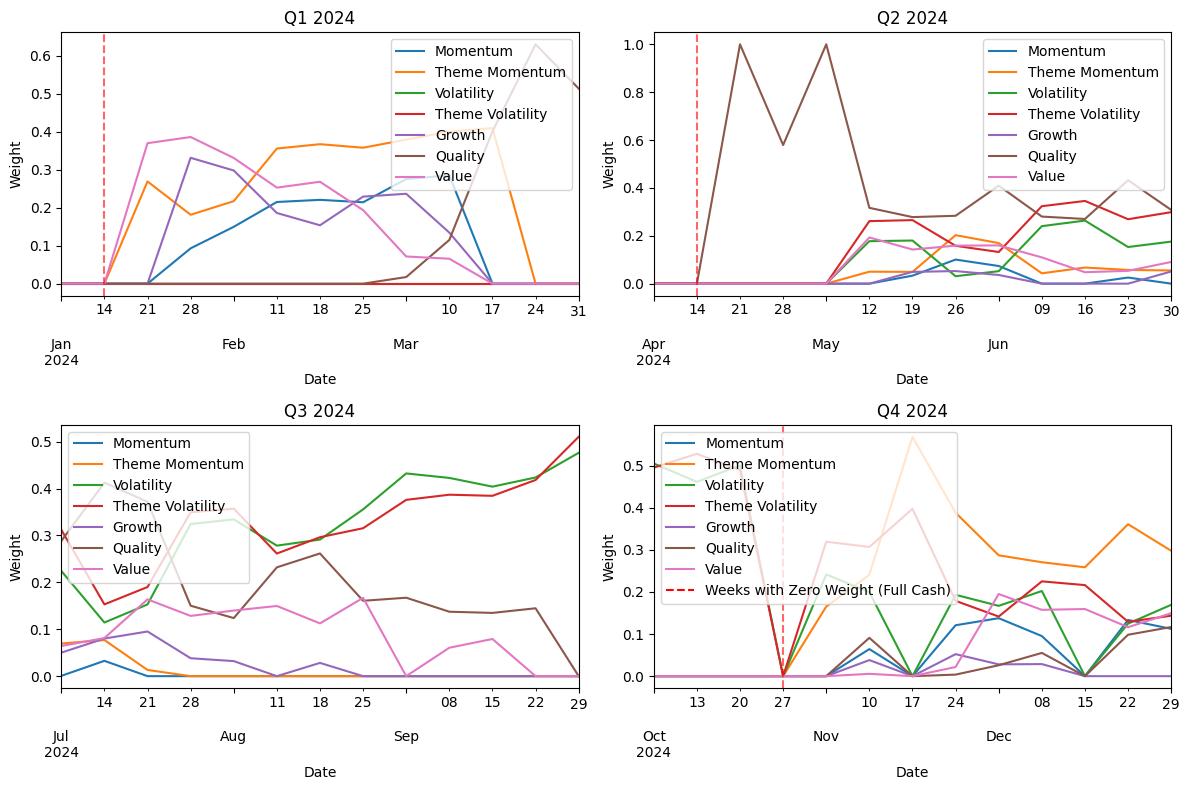

In [23]:
# # First, check which column name is used for Nifty
# nifty_column = 'Nifty500'
# if 'Nifty 500' in df_avg_zscores.columns:
#     nifty_column = 'Nifty 500'

# # Get all dates where Nifty z-score is NaN
# nan_nifty_dates = df_avg_zscores[df_avg_zscores[nifty_column].isna()].index

# # Print the number of dates with NaN Nifty values
# print(f"Total dates with NaN Nifty z-score: {len(nan_nifty_dates)}")

# # Print the first few dates with NaN values if any exist
# if len(nan_nifty_dates) > 0:
#     print("\nFirst 10 dates with NaN Nifty z-score:")
#     for date in nan_nifty_dates[:10]:
#         print(f"  {date}")
    
#     # Optional: Save these dates to a file
#     pd.Series(nan_nifty_dates).to_csv("nan_nifty_dates.csv", index=False, header=['Date'])
# else:
#     print("No dates found with NaN Nifty z-score.")

# # Optional: Check what percentage of your dataset has NaN Nifty values
# total_dates = len(df_avg_zscores)
# nan_percentage = (len(nan_nifty_dates) / total_dates) * 100
# print(f"\nPercentage of dates with NaN Nifty z-score: {nan_percentage:.2f}%")

# # To get a better understanding, check the date range of NaN values
# if len(nan_nifty_dates) > 0:
#     first_nan_date = min(nan_nifty_dates)
#     last_nan_date = max(nan_nifty_dates)
#     print(f"\nDate range of NaN values: {first_nan_date} to {last_nan_date}")


# Define last date and filter for last 2 years
last_date = all_weights_df.index.max()
start_date = last_date - pd.DateOffset(years=2)
all_weights_4y = all_weights_df[all_weights_df.index >= start_date]

# Resample to weekly
all_weights_weekly = all_weights_4y.resample('W').median()

# Filter for CY 2024
all_weights_2024 = all_weights_weekly[all_weights_weekly.index.year == 2024]

# Identify zero-weight weeks
zero_days = all_weights_2024[(all_weights_2024 == 0).all(axis=1)].index

# Split data into four quarters
quarters = {
    "Q1 2024": all_weights_2024.loc["2024-01-01":"2024-03-31"],
    "Q2 2024": all_weights_2024.loc["2024-04-01":"2024-06-30"],
    "Q3 2024": all_weights_2024.loc["2024-07-01":"2024-09-30"],
    "Q4 2024": all_weights_2024.loc["2024-10-01":"2024-12-31"],
}

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Flatten to make indexing easier

for i, (quarter, df) in enumerate(quarters.items()):
    ax = axes[i]
    
    # Plot weights
    df.plot(ax=ax, title=quarter)

    # Add vertical red dotted lines for zero-weight weeks
    for day in zero_days:
        if day in df.index:
            ax.axvline(day, color='red', linestyle='--', alpha=0.6)

    ax.set_ylabel('Weight')

# Add a single legend for cash weeks in the last subplot
axes[3].plot([], [], 'r--', label="Weeks with Zero Weight (Full Cash)")
axes[3].legend(loc='upper left')

plt.tight_layout()
plt.show()

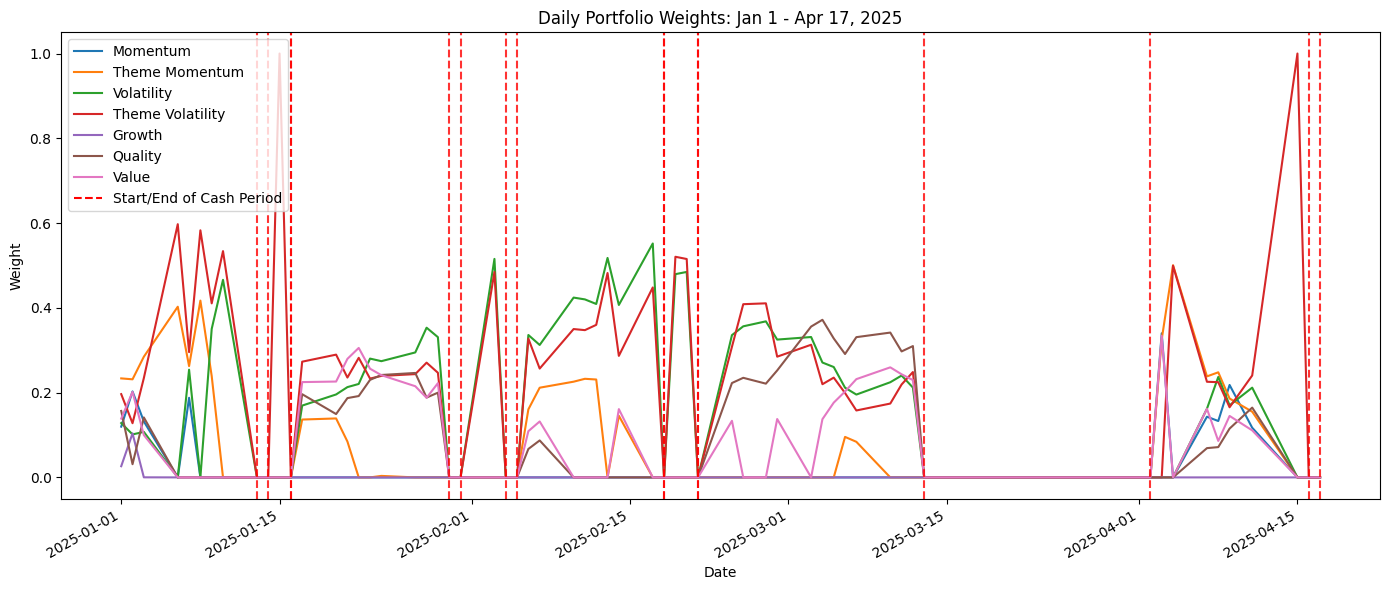

In [24]:
# Define date range
start_plot_date = pd.to_datetime("2025-01-01")
end_plot_date = pd.to_datetime("2025-04-17")

# Filter for the desired date range (daily data)
all_weights_2025_q1 = all_weights_df[(all_weights_df.index >= start_plot_date) & 
                                     (all_weights_df.index <= end_plot_date)]

# Identify cash days (all weights are zero)
is_cash_day = (all_weights_2025_q1 == 0).all(axis=1)

# Find start and end of cash periods
cash_periods = []
in_cash = False
for date, is_zero in is_cash_day.items():
    if is_zero and not in_cash:
        start_cash = date
        in_cash = True
    elif not is_zero and in_cash:
        end_cash = prev_date
        cash_periods.append((start_cash, end_cash))
        in_cash = False
    prev_date = date

# Handle if still in cash at end of date range
if in_cash:
    cash_periods.append((start_cash, prev_date))

# Plot
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Plot weights
all_weights_2025_q1.plot(ax=ax, title="Daily Portfolio Weights: Jan 1 - Apr 17, 2025")

# Plot red vertical lines at start and end of each cash period
for start_cash, end_cash in cash_periods:
    ax.axvline(start_cash, color='red', linestyle='--', alpha=0.8)
    ax.axvline(end_cash, color='red', linestyle='--', alpha=0.8)

# Add legend for cash periods
ax.plot([], [], 'r--', label="Start/End of Cash Period")
ax.legend(loc='upper left')

plt.ylabel('Weight')
plt.tight_layout()
plt.show()


In [25]:
all_weights_df.tail(7)

,Momentum,Theme Momentum,Volatility,Theme Volatility,Growth,Quality,Value
Date,,,,,,,
2025-04-07,0.143185,0.238288,0.162104,0.225635,0.0,0.069063,0.161724
2025-04-08,0.133034,0.247944,0.236910,0.224628,0.0,0.071475,0.086009
2025-04-09,0.218115,0.186155,0.170061,0.165483,0.0,0.115163,0.145023
2025-04-11,0.117185,0.155000,0.211745,0.240482,0.0,0.164654,0.110935
2025-04-15,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
2025-04-16,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2025-04-17,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


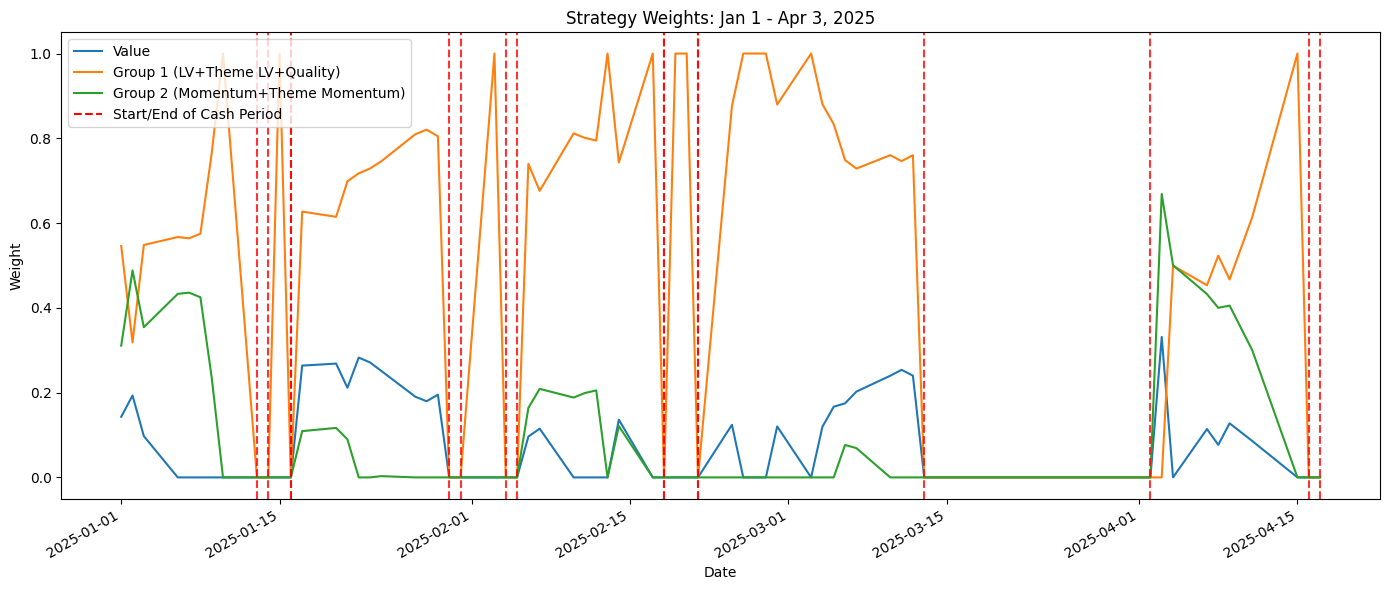

In [26]:
# Define date range
start_plot_date = pd.to_datetime("2025-01-01")
end_plot_date = pd.to_datetime("2025-04-17")

# Filter for the desired date range
weights_q1 = max_weights_df.loc[start_plot_date:end_plot_date]

# Define component groups
group_1_cols = ['Volatility', 'Theme Volatility', 'Quality']
group_2_cols = ['Momentum', 'Theme Momentum', 'Growth']
value_col = 'Value'  # standalone
mr_col  = 'Mean Reversion'

# Create a new DataFrame with the three combined strategies
plot_df = pd.DataFrame(index=weights_q1.index)
plot_df['Value'] = weights_q1[value_col]
plot_df['Group 1 (LV+Theme LV+Quality)'] = weights_q1[group_1_cols].sum(axis=1)
plot_df['Group 2 (Momentum+Theme Momentum)'] = weights_q1[group_2_cols].sum(axis=1)

# Identify full cash days (all weights are zero across the original set)
is_cash_day = (weights_q1 == 0).all(axis=1)

# Detect cash period start/end
cash_periods = []
in_cash = False
prev_date = None
for date, is_zero in is_cash_day.items():
    if is_zero and not in_cash:
        start_cash = date
        in_cash = True
    elif not is_zero and in_cash:
        end_cash = prev_date
        cash_periods.append((start_cash, end_cash))
        in_cash = False
    prev_date = date
if in_cash:
    cash_periods.append((start_cash, prev_date))

# Plot
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Plot combined strategy weights
plot_df.plot(ax=ax, title="Strategy Weights: Jan 1 - Apr 3, 2025")

# Red vertical lines at start/end of cash periods
for start_cash, end_cash in cash_periods:
    ax.axvline(start_cash, color='red', linestyle='--', alpha=0.8)
    ax.axvline(end_cash, color='red', linestyle='--', alpha=0.8)

# Add legend for cash periodsa
ax.plot([], [], 'r--', label="Start/End of Cash Period")
ax.legend(loc='upper left')

plt.ylabel("Weight")
plt.tight_layout()
plt.show()

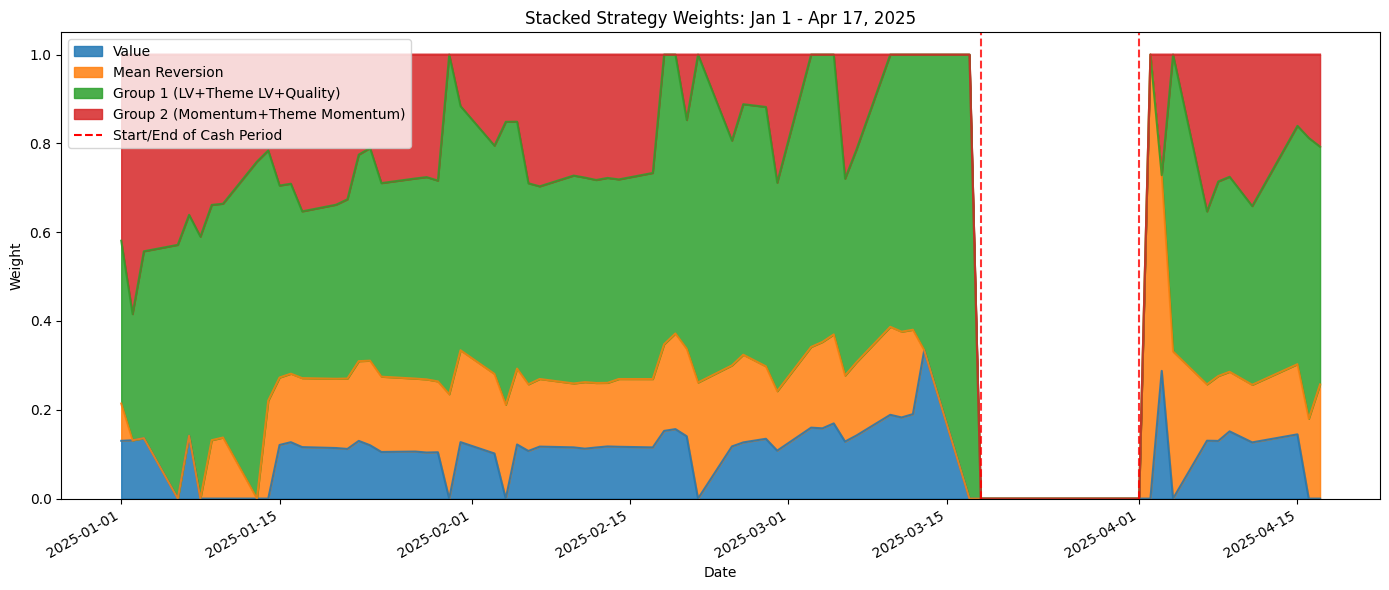

In [54]:
# Plot (Stacked Area Chart)
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Plot stacked area chart
plot_df.plot.area(ax=ax, title="Stacked Strategy Weights: Jan 1 - Apr 17, 2025", alpha=0.85)

# Red vertical lines at start/end of cash periods
for start_cash, end_cash in cash_periods:
    ax.axvline(start_cash, color='red', linestyle='--', alpha=0.8)
    ax.axvline(end_cash, color='red', linestyle='--', alpha=0.8)

# Add legend entry for cash lines
ax.plot([], [], 'r--', label="Start/End of Cash Period")
ax.legend(loc='upper left')

plt.ylabel("Weight")
plt.tight_layout()
plt.show()


In [80]:
all_weights_df.to_csv('UpdatedWeights.csv')

In [61]:
df_avg_zscores[['AntiTrendMR','TrendMR']]

,AntiTrendMR,TrendMR
Date,,
2006-06-21,NaN,NaN
2006-06-22,NaN,NaN
2006-06-23,NaN,NaN
2006-06-26,NaN,NaN
2006-06-27,NaN,NaN
...,...,...
2025-04-09,0.121141,-0.039377
2025-04-11,0.221019,0.037370
2025-04-15,0.276149,0.074715


In [64]:

# Copy the relevant part
weights_df = df_avg_zscores[['AntiTrendMR', 'TrendMR']].copy()

# Initialize weight columns
weights_df['Weight_AntiTrend'] = np.nan
weights_df['Weight_Trend'] = np.nan

# Row-wise computation
for idx, row in weights_df.iterrows():
    x = row['AntiTrendMR']
    y = row['TrendMR']
    
    if pd.notnull(x) and pd.notnull(y):
        if x >= 0 and y >= 0:
            weights_df.at[idx, 'Weight_AntiTrend'] = x / (x + y) if (x + y) != 0 else 0
            weights_df.at[idx, 'Weight_Trend'] = y / (x + y) if (x + y) != 0 else 0
        elif x < 0 and y >= 0:
            weights_df.at[idx, 'Weight_AntiTrend'] = 0
            weights_df.at[idx, 'Weight_Trend'] = 1
        elif y < 0 and x >= 0:
            weights_df.at[idx, 'Weight_AntiTrend'] = 1
            weights_df.at[idx, 'Weight_Trend'] = 0
        else:
            weights_df.at[idx, 'Weight_AntiTrend'] = np.nan
            weights_df.at[idx, 'Weight_Trend'] = np.nan

# Combine with original if needed

In [66]:
weights_df = weights_df[['Weight_AntiTrend','Weight_Trend']]
weights_df

,Weight_AntiTrend,Weight_Trend
Date,,
2006-06-21,NaN,NaN
2006-06-22,NaN,NaN
2006-06-23,NaN,NaN
2006-06-26,NaN,NaN
2006-06-27,NaN,NaN
...,...,...
2025-04-09,1.000000,0.000000
2025-04-11,0.855374,0.144626
2025-04-15,0.787055,0.212945


In [67]:
weights_df.to_csv('WeightsMRInternal.csv')

,Weight_AntiTrend,Weight_Trend
Date,,
2006-08-23,0.361172,0.638828
2006-08-24,0.250526,0.749474
2006-08-25,0.131773,0.868227
2006-08-28,0.000000,1.000000
2006-08-29,0.371975,0.628025
...,...,...
2025-04-09,1.000000,0.000000
2025-04-11,0.855374,0.144626
2025-04-15,0.787055,0.212945
